# **REGRESIÓN LINEAL CON SCIKIT-LEARN**

In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score
import pandas as pd
from sklearn.preprocessing import StandardScaler  
import random
import seaborn as sns

# **BOSTON DATASET**

Cargar data set y separar datos (x) de target (y)

**Regresión ND**

**Problema**: Predecir el precio de una casa en base a información existente en una base de datos.

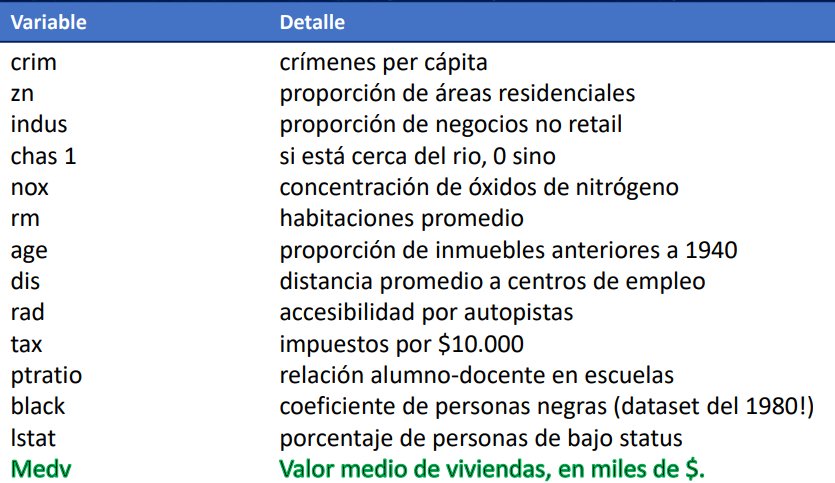

In [2]:
data= pd.read_csv("https://raw.githubusercontent.com/KevinFDI/IML_Practica_2/main/datasets/boston.csv") 
x= data.drop('medv', axis=1)
y= data['medv']
n,d= x.shape
print("El dataset tiene %d registros, de %d dimensiones" %(n, d))

El dataset tiene 506 registros, de 13 dimensiones


**Boston dataset – histogramas por variable**

Visualizar distribución de los features

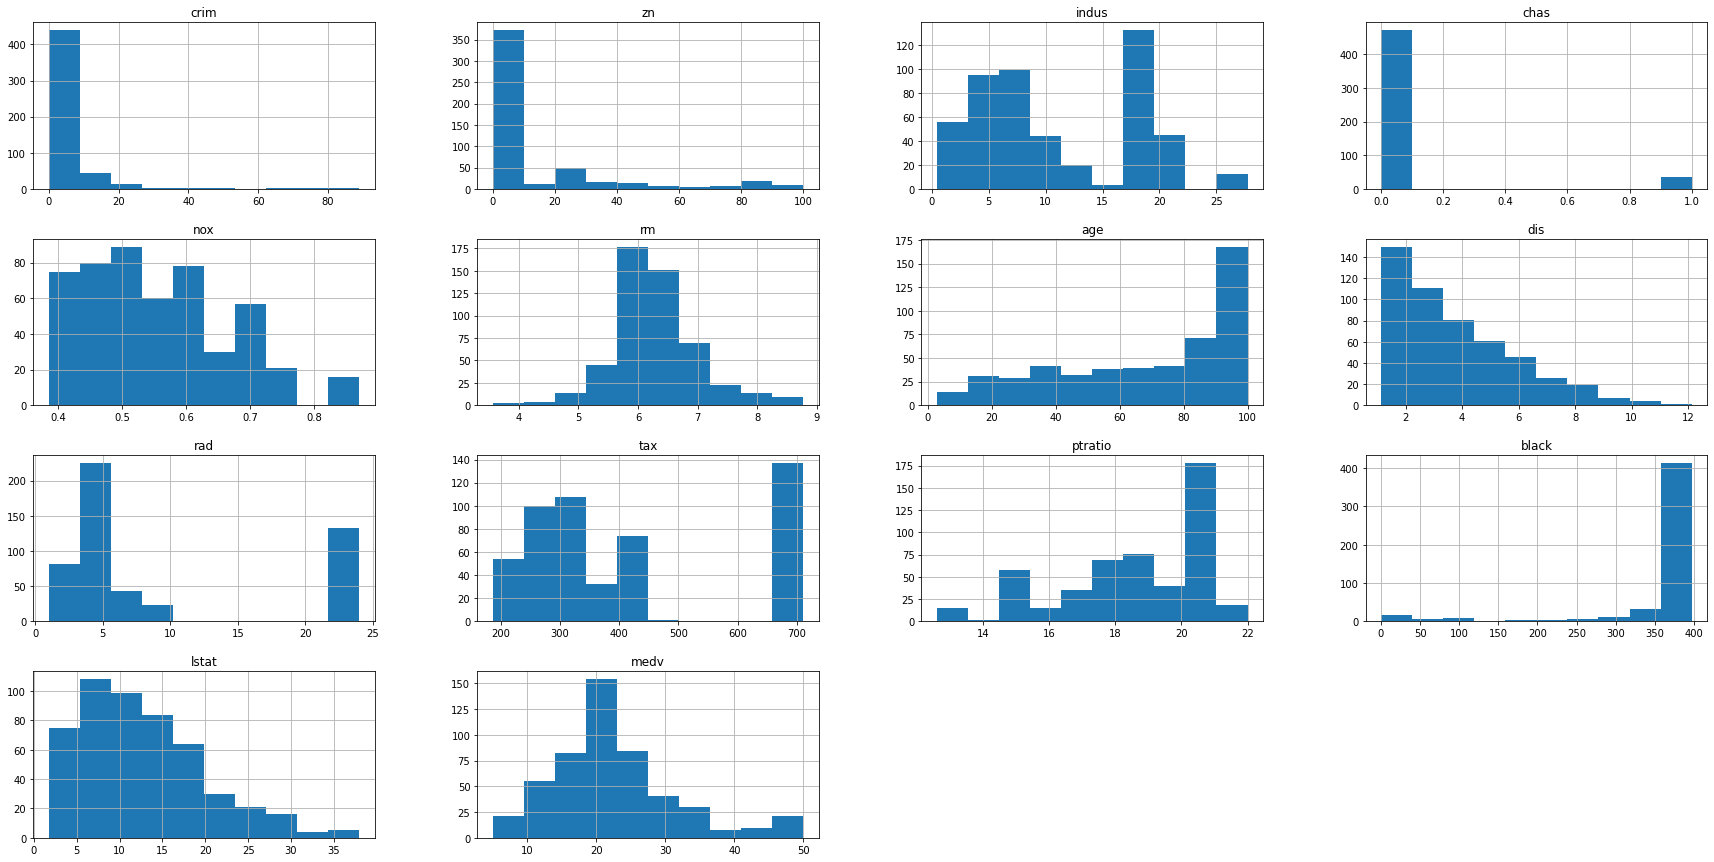

In [3]:
data.hist(figsize=(30,15));

**Matriz de correlación entre atributos**

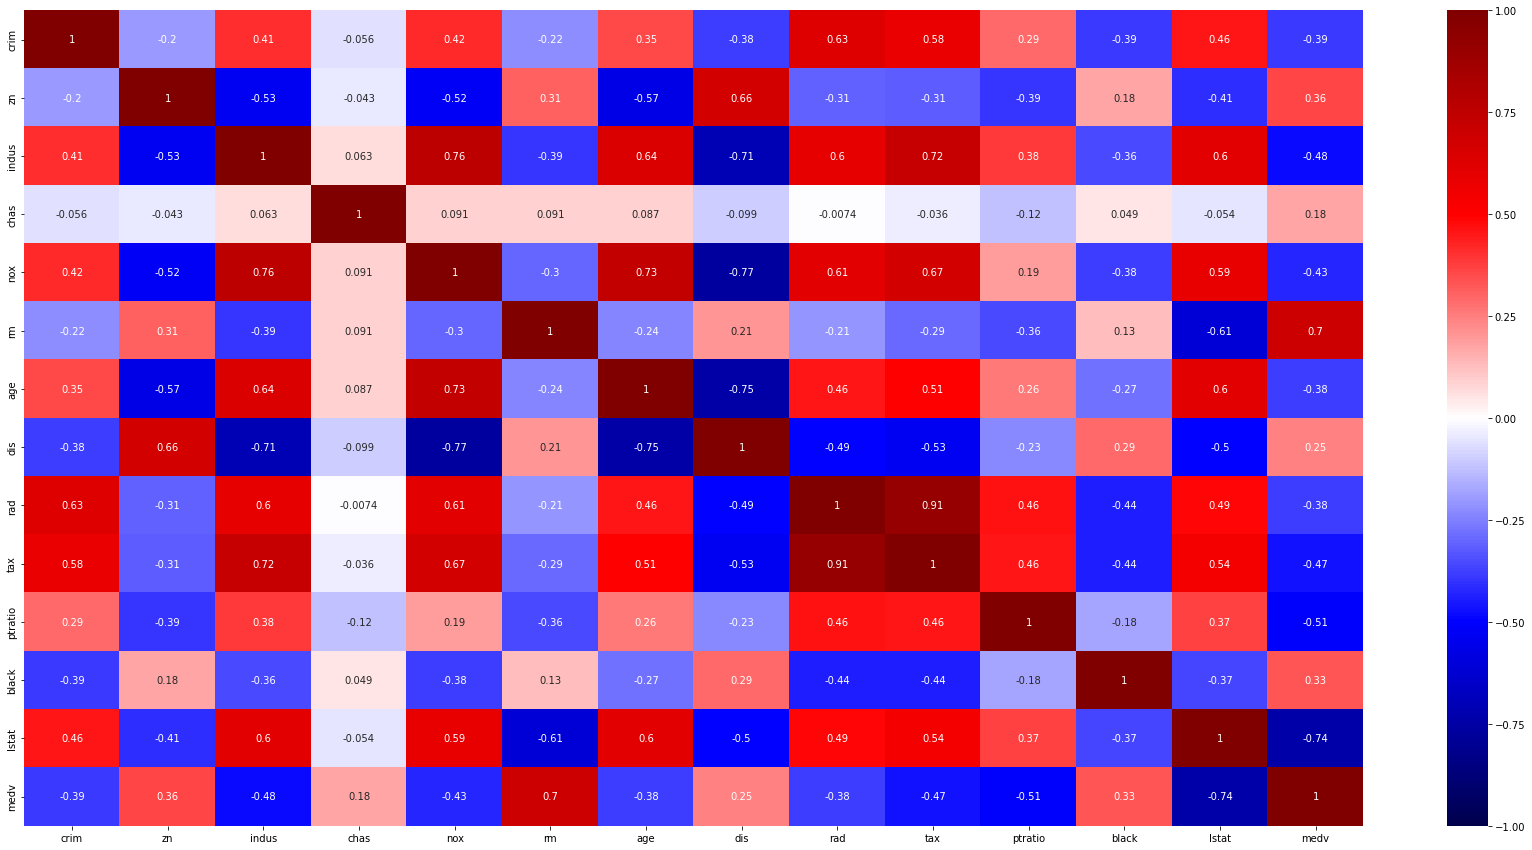

In [4]:
corr= data.corr()
plt.figure(figsize=(30,15))
sns.heatmap(corr, annot=True, vmin=-1, vmax=1, cmap='seismic');

Muestra si las variables están correlacionadas y si se correlacionan positivamente (cercano a un 1, color bordo) o  negativamente (cercano a -1, color azul).

**OBSERVACIÓN**: La variable tax (impuestos) se correlaciona muy positivamente con la de rad (accesibilidad por autopistas).

# **NORMALIZAR LOS DATOS**

Normalizo porque sino tendré un problema de interpretación de resultados.

In [6]:
NORMALIZAR= 1
if (NORMALIZAR):
    scaler = StandardScaler()  
    scaler.fit(x)  
    x= scaler.transform(x)

# **ENTRENAR EL MODELO DE REGRESIÓN LINEAL**

Crear el objeto modelo de regresión lineal

In [7]:
modelo= LinearRegression()

# **ENTRENA**

Entrenamiento de un modelo

In [8]:
modelo.fit(x, y)

LinearRegression()

Utilizar el modelo entrenado para predecir nuevos valores

In [9]:
y_predict= modelo.predict(x)

Calculo del error del modelo

Calculamos el error cuadrático medio y el error absoluto medio para el modelo entrenado

In [10]:
mse_error= mean_squared_error(y_predict, y)
print("Error cuad. medio: %.2f" % mse_error)

mae_error= mean_absolute_error(y_predict, y)
print("Error abs. medio: %.2f" % mae_error)

r2_s = r2_score(y, y_predict) # Devuelve como se ajustan estas dos variables.
print("r2_score: %.2f" % r2_s) # En este caso devuelve 0.74 lo cual no esta tan bueno pero tampoco esta tan mal.

Error cuad. medio: 21.89
Error abs. medio: 3.27
r2_score: 0.74


# **PLOT COEFICIENTES**

**Coeficientes del modelo** (parámetros)

Sklearn pone un guión bajo a todas las variables que derivan de los datos de entrenamiento (para no confundir con parámetros del usuario).

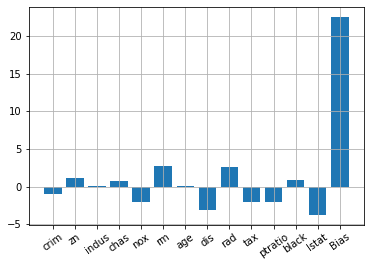

In [11]:
w= modelo.coef_
b= modelo.intercept_
d = x.shape[1]
plt.bar(range(d+1), np.concatenate((w,[b])));
labels = data.columns.values; labels[-1]= 'Bias'
plt.xticks(range(w.shape[0]+1), labels, rotation= 35)
plt.grid()

Gráfico de los coeficientes.

Todas las columnas menos la última son las "m" del problema (pendientes para cada una de las variables).

La última columna es la ordenada al origen.

**OBSERVACIÓN: La regresión lineal es un modelo de caja blanca porque se puede interpretar cada uno de los coeficientes y observar que sucede en el modelo**:
*   La variable "rm" son las habitaciones promedio, y se observa que a mayor habitaciones, mayor es el precio.
*   La variable rad (accesibilidad por autopistas) indica que a mayor rad en el barrio, mayor precio.
*   La variable "dis" indica la distancia al empleo. A mayor distancia se observa que los precios disminuyen.
*   El modelo no tiene en cuenta a la variable "age" que son la proporción de inmuebles anteriores a 1940.




# **PLOT VALORES ESPERADOS VS. VALORES PREDICTIVOS**

(Text(0.5, 0, 'valores reales'), Text(0, 0.5, 'Valores predichos'))

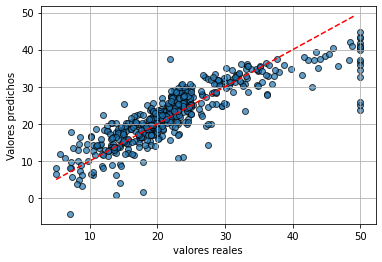

In [12]:
plt.figure()
xx= range(round(y.min()),round(y.max()))
plt.scatter(y, y_predict,alpha=0.7, edgecolor='k'), plt.grid()
plt.plot(xx, xx, 'r--')
plt.xlabel("valores reales"), plt.ylabel("Valores predichos")

En el eje "x" están los valores reales, mientras que en el eje "y" los predichos para todos los datos del dataset.

La línea roja es el ideal, recta identidad. 

**OBSERVACIÓN**: Se observa que para casas con precios muy bajos (menos a 10) el modelo le erra por mucho. Lo mismo para valores muy grandes (mayores a 40) donde los subvalua. 

Como se observa en el histograma de abajo, esto se da porque hay muchas casas entre los 10 a 30 y poca cantidad para el resto de los valores. Dado esto, el modelo está sesgado.

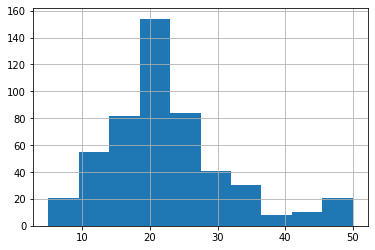

In [13]:
data['medv'].hist();

Se llama “modelo de caja blanca” a la regresión lineal ya que es posible interpretar los coeficientes. Se puede verificar si cada variable influye positiva o negativamente en el precio, pero los valores no son comparables, ya que las variables no están normalizadas.

# **EVALUACIÓN DEL MODELO CON NUEVO DATO**

In [14]:
index_i= random.randint(0, x.shape[0]-1) # Toma un índice aleatorio de mi base de datos, agarrarlo y predecir.
x_nuevo= np.zeros((1,d))
x_nuevo[0]=x[index_i, :]
y_real= y[index_i]
y_predict= modelo.predict(x_nuevo)
x_nuevo_sin_norm= scaler.inverse_transform(x_nuevo)

print("\nNuevo dato (%d):" % (index_i))
print("El modelo predice: %f " % ( y_predict))
print("El valor real es: %f" % (y_real))


Nuevo dato (101):
El modelo predice: 25.594135 
El valor real es: 26.500000


En promedio el modelo debería comportarse medianamente bien.

**Coeficientes del modelo – Variables normalizadas**

Normalizamos las variables con z-core

In [15]:
scaler = StandardScaler()
scaler.fit(x)
x= scaler.transform(x)

Se podría haber utilizado esta normalización también.